In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.preprocessing import StandardScaler
#Warnings
import warnings
warnings.filterwarnings('ignore')

#***Load the Dataset:-***

In [2]:
#load the train dataset
train_df=pd.read_csv('/content/train.csv')

In [3]:
#Load the test dataset
test_df=pd.read_csv('/content/test.csv')

In [4]:
train_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


In [5]:
#shape of dataset
train_df.shape

(517754, 14)

In [6]:
test_df.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [7]:
#shape of test dataset
test_df.shape

(172585, 13)

#***EDA(Explotary Data Analysis):-***

In [8]:
#train_data information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

In [9]:
#Test_dataset information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172585 entries, 0 to 172584
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      172585 non-null  int64  
 1   road_type               172585 non-null  object 
 2   num_lanes               172585 non-null  int64  
 3   curvature               172585 non-null  float64
 4   speed_limit             172585 non-null  int64  
 5   lighting                172585 non-null  object 
 6   weather                 172585 non-null  object 
 7   road_signs_present      172585 non-null  bool   
 8   public_road             172585 non-null  bool   
 9   time_of_day             172585 non-null  object 
 10  holiday                 172585 non-null  bool   
 11  school_season           172585 non-null  bool   
 12  num_reported_accidents  172585 non-null  int64  
dtypes: bool(4), float64(1), int64(4), object(4)
memory usage: 12.5+ MB


In [10]:
#check the null values
train_df.isnull().sum()

,0
id,0
road_type,0
num_lanes,0
curvature,0
speed_limit,0
lighting,0
weather,0
road_signs_present,0
public_road,0
time_of_day,0


In [11]:
#test_df null values check
test_df.isnull().sum()

,0
id,0
road_type,0
num_lanes,0
curvature,0
speed_limit,0
lighting,0
weather,0
road_signs_present,0
public_road,0
time_of_day,0


In [12]:
#Check the duplicate dataset in both train and test
train_df.duplicated().sum()

np.int64(0)

In [13]:
test_df.duplicated().sum()

np.int64(0)

In [14]:
#drop the column
train_df.drop('id',axis=1,inplace=True)

In [15]:
train_df.head()

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


#***Graphical presentation:-***

In [16]:
#categories the categorical column
train_df.select_dtypes(include='object').columns

Index(['road_type', 'lighting', 'weather', 'time_of_day'], dtype='object')

In [17]:
#save these culumn in category column
category_column=train_df.select_dtypes(include='object').columns

In [18]:
#numerical column
train_df.select_dtypes(exclude='object').columns

Index(['num_lanes', 'curvature', 'speed_limit', 'road_signs_present',
       'public_road', 'holiday', 'school_season', 'num_reported_accidents',
       'accident_risk'],
      dtype='object')

In [19]:
#save the numerical column
numerical_column=train_df.select_dtypes(exclude='object').columns

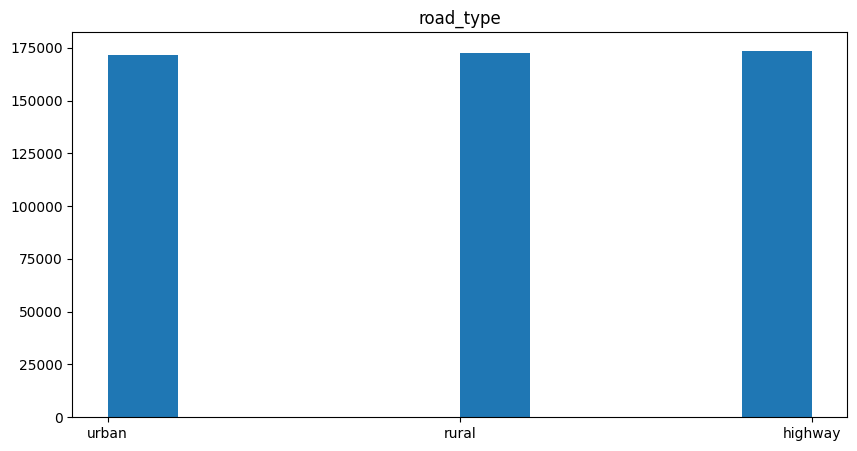

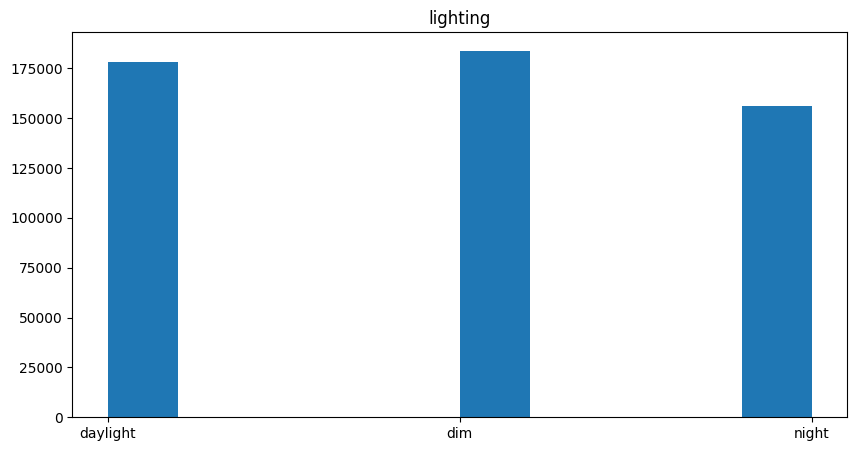

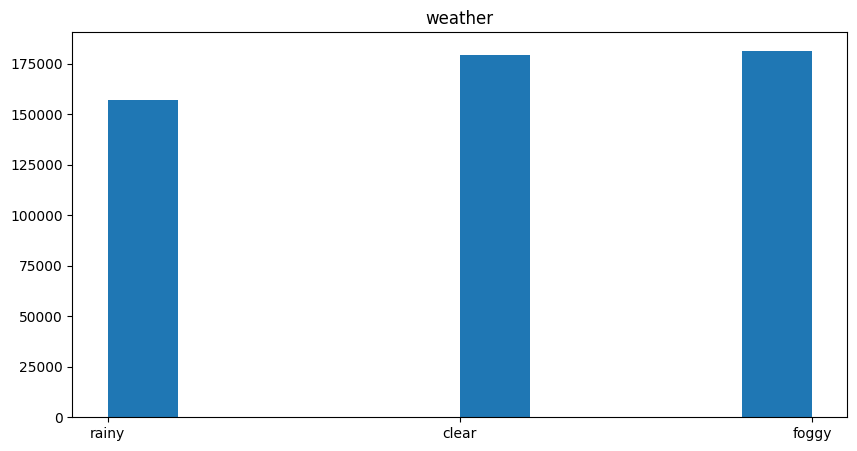

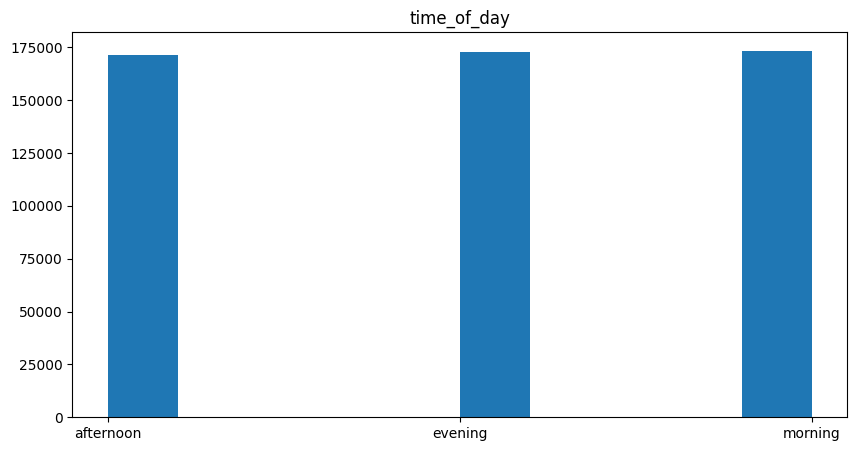

In [20]:
#graphical presentation on categorical column usinfg for loop
for col in category_column:
  plt.figure(figsize=(10,5))
  plt.hist(train_df[col])
  plt.title(col)
  plt.show()

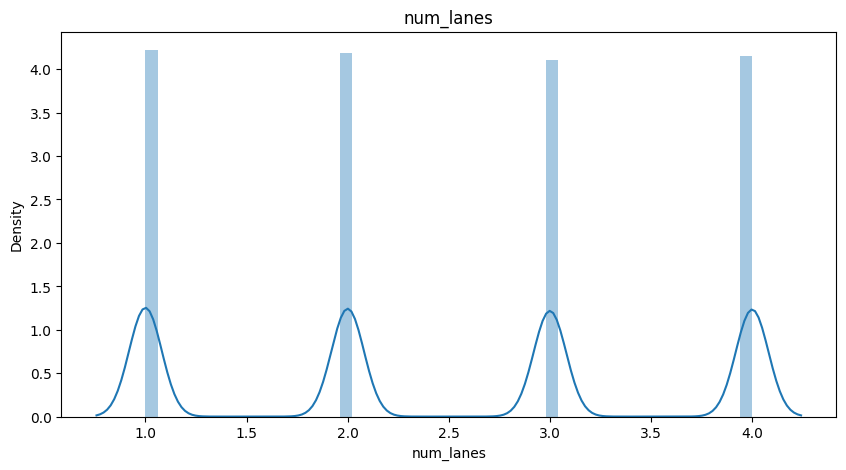

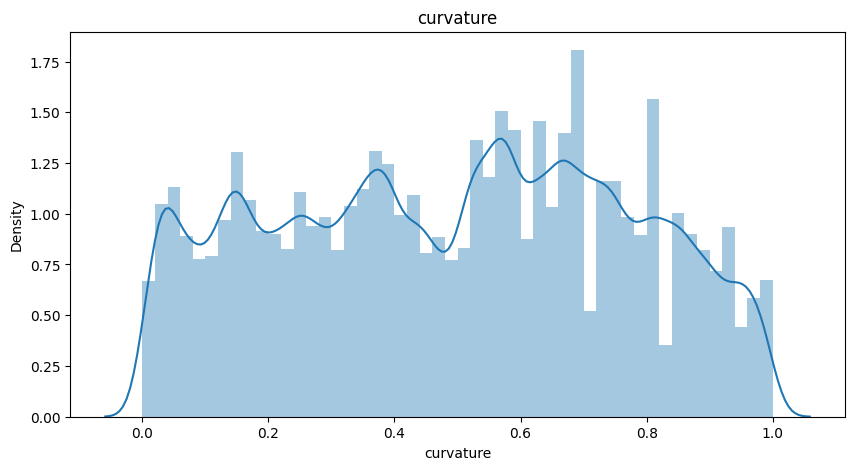

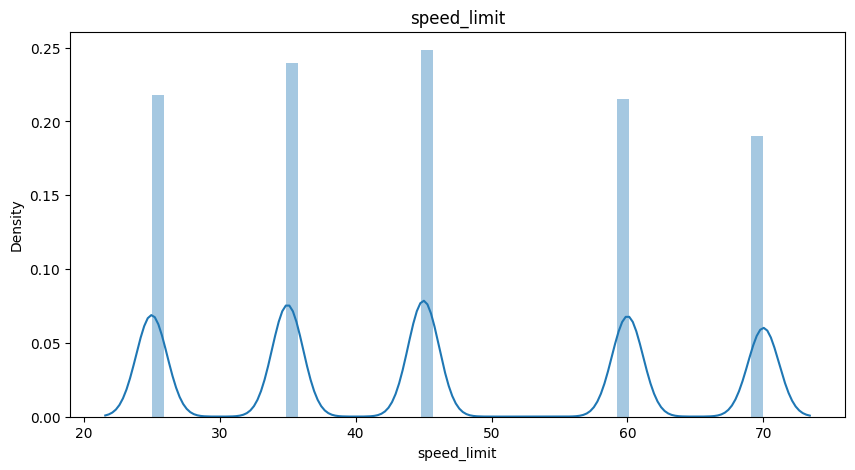

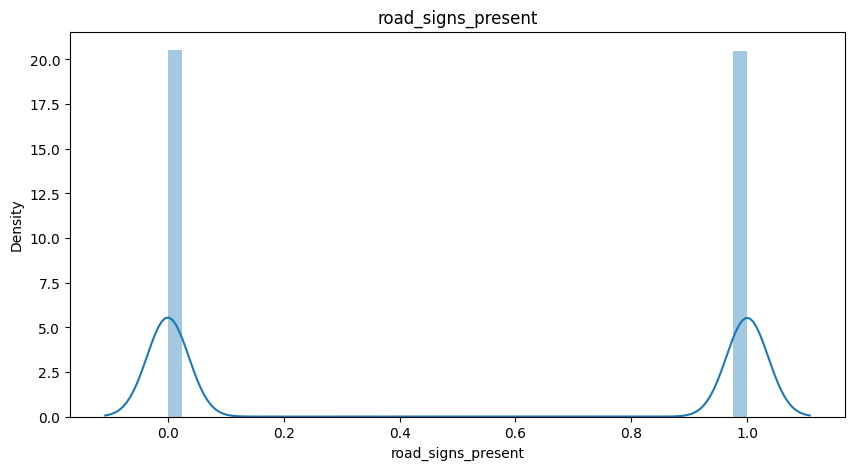

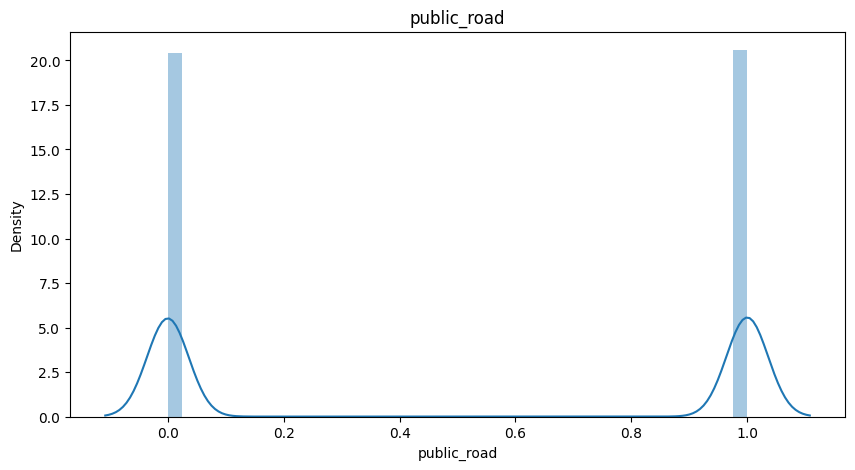

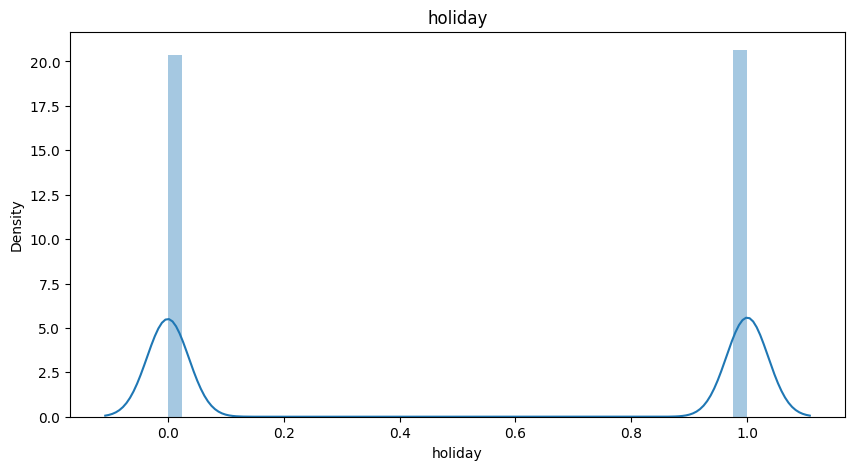

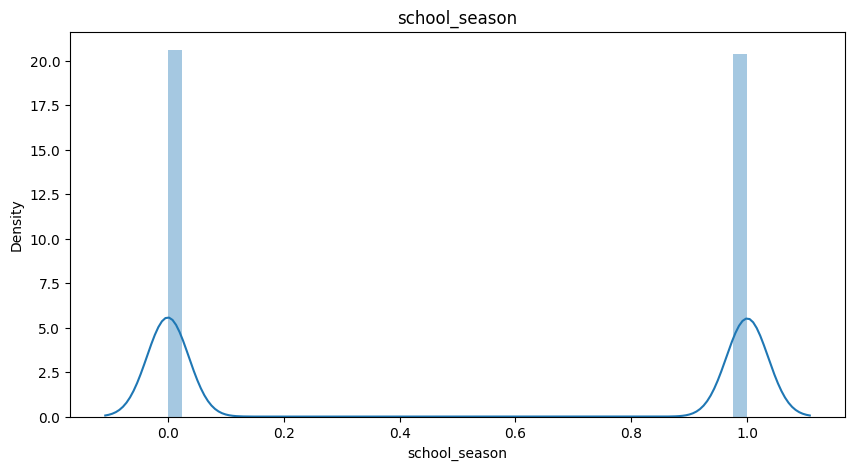

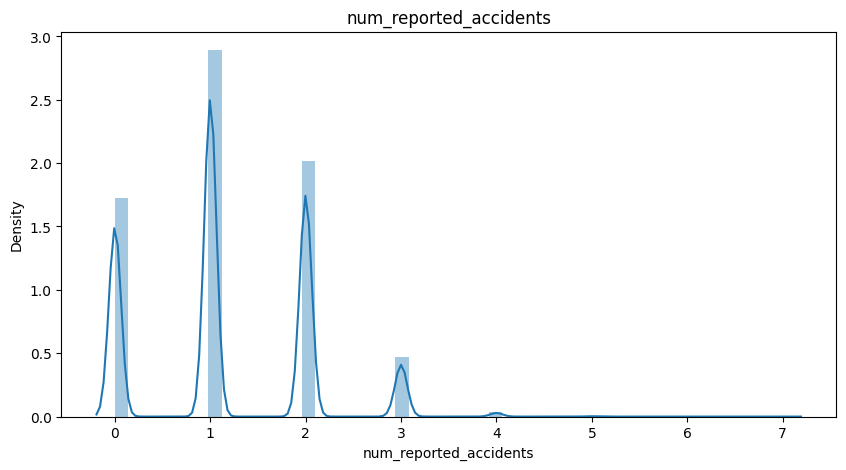

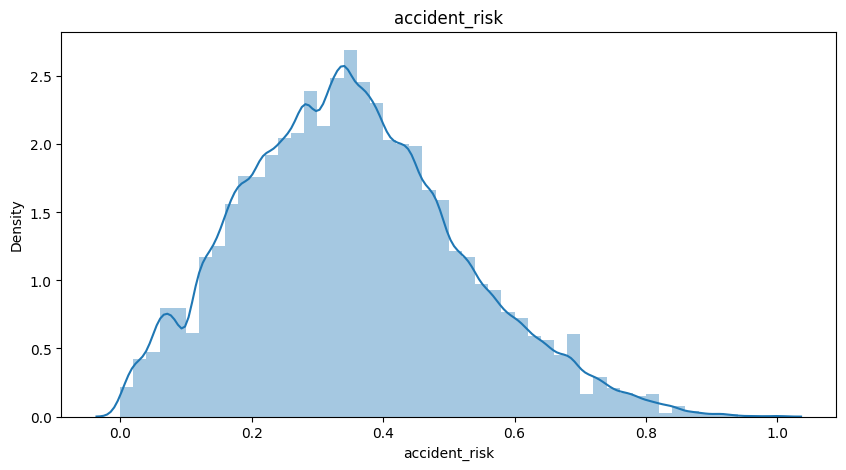

In [21]:
#graphical representation of numerical column
for col in numerical_column:
  plt.figure(figsize=(10,5))
  sns.distplot(train_df[col])
  plt.title(col)
  plt.show()

#***Target column compare with other column(features):-***

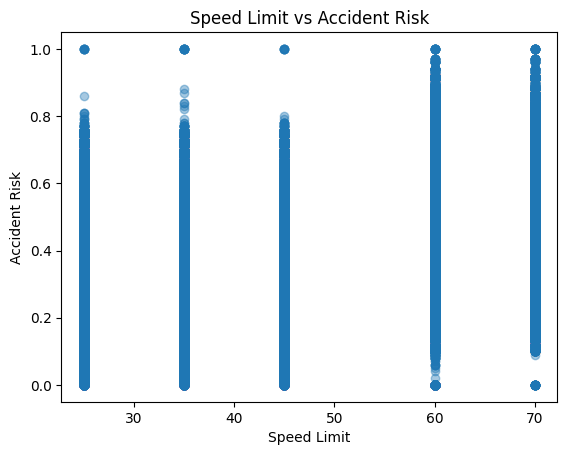

In [22]:
#Speed Limit vs Accident Risk:-
plt.figure()
plt.scatter(train_df['speed_limit'], train_df['accident_risk'], alpha=0.4)
plt.xlabel('Speed Limit')
plt.ylabel('Accident Risk')
plt.title('Speed Limit vs Accident Risk')
plt.show()

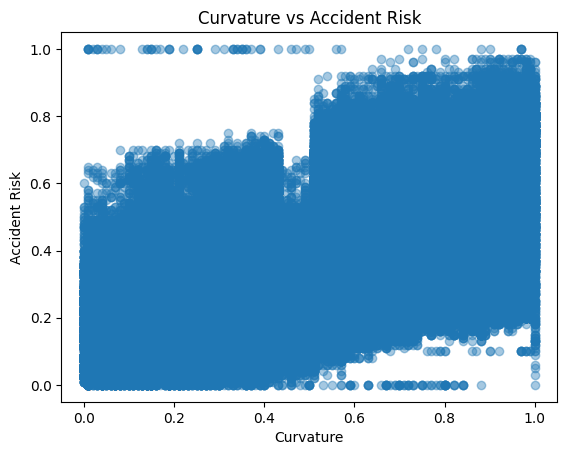

In [23]:
#Curvature vs Accident Risk
plt.figure()
plt.scatter(train_df['curvature'], train_df['accident_risk'], alpha=0.4)
plt.xlabel('Curvature')
plt.ylabel('Accident Risk')
plt.title('Curvature vs Accident Risk')
plt.show()

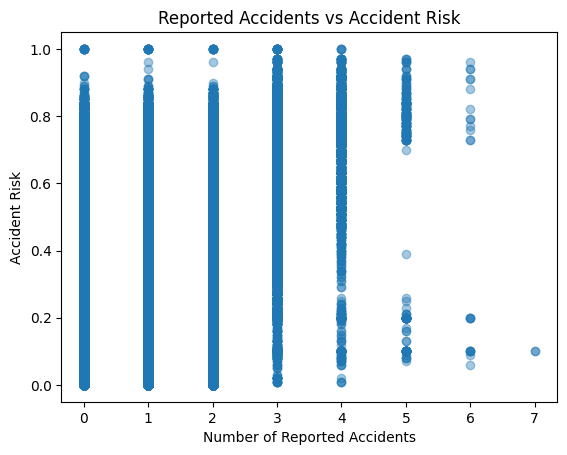

In [24]:
#Number of Reported Accidents vs Accident Risk
plt.figure()
plt.scatter(train_df['num_reported_accidents'], train_df['accident_risk'], alpha=0.4)
plt.xlabel('Number of Reported Accidents')
plt.ylabel('Accident Risk')
plt.title('Reported Accidents vs Accident Risk')
plt.show()

In [31]:
categorical_cols = [
    'road_type', 'lighting', 'weather', 'time_of_day'
]

numeric_cols = [
    'num_lanes', 'curvature', 'speed_limit',
    'num_reported_accidents',
    'road_signs_present', 'public_road',
    'holiday', 'school_season'
]


#***CREATE PIPLEINE(MODEL+COLUMN TRANSFER):-***

In [32]:
#create model and
pipeline = Pipeline(steps=[
    ('preprocessing', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(
                handle_unknown='ignore',
                sparse_output=False
            ), categorical_cols),
            ('num', 'passthrough', numeric_cols)
        ]
    )),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])


#***Separate Train data to X,Y:-***

In [35]:
#separate target column
X_train = train_df.drop('accident_risk', axis=1)
y_train = train_df['accident_risk']

#***Apply the model :-***

In [36]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['road_type', 'lighting',
                                                   'weather', 'time_of_day']),
                                                 ('num', 'passthrough',
                                                  ['num_lanes', 'curvature',
                                                   'speed_limit',
                                                   'num_reported_accidents',
                                                   'road_signs_present',
                                                   'public_road', 'holiday',
                                                   'school_season'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

#***Save the Model:-***

In [37]:
#save the model
joblib.dump(pipeline, 'accident_risk_model.pkl')

['accident_risk_model.pkl']

#***Predict the Accient column using model in test daatset:-***

In [39]:
test_df.shape

(172585, 13)

In [38]:
X_test = test_df.drop(['id'], axis=1)

In [40]:
#shape
X_test.shape

(172585, 12)

#***Load the model :-***

In [ ]:
#load the model
import joblib
model = joblib.load('/content/accident_risk_model.pkl')

In [ ]:
#Predict target column
y_pred = model.predict(X_test)